# Hausaufgabe 4

### Abgage via studip bis spätestens 05.06. 12:00 Uhr (zur VL)! 
### Verteidigung 08.06. 08:00-10:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.

```pip install bash_kernel ; python -m bash_kernel.install```

In [150]:
%%bash
pip3 install pandas requests matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [151]:
import pandas as pd

## Aufgabe 1: Pandas Basics (14%)

#### 1. (2%) Importieren Sie die csv-Datei "tips" von https://github.com/mwaskom/seaborn-data.

In [152]:
import requests
import matplotlib.pyplot as plt
import io

URL_CSV = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
csv_data = requests.get(URL_CSV).content
df = pd.read_csv(io.StringIO(csv_data.decode('utf-8')))
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### 2. (2%) Wie viele Spalten und Zeilen hat dieser dataframe?

In [153]:
print(f"Anzahl der Zeilen: {df.shape[0]}")
print(f"Anzahl der Spalten: {df.shape[1]}")

Anzahl der Zeilen: 244
Anzahl der Spalten: 7


#### 3. (2%) Was sind die Spalten des dataframe?

In [154]:
print(df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


#### 4. (2%) Wie viele numerische und nicht-numerische Spalten enthält es?

In [155]:
# Ausgabe der Anzahl der numerischen Spalten
num_cols = df.select_dtypes(include=['number']).shape[1]
print(f"Anzahl der numerischen Spalten: {num_cols}")

# Ausgabe der Anzahl der nichtnumerischen Spalten
non_num_cols = df.select_dtypes(exclude=['number']).shape[1]
print(f"Anzahl der nichtnumerischen Spalten: {non_num_cols}")

Anzahl der numerischen Spalten: 3
Anzahl der nichtnumerischen Spalten: 4


#### 5. (2%) Wie hoch ist der durchschnittliche Betrag der Gesamtrechnung?

In [156]:
mean = df['total_bill'].mean()
print(f"Durchschnitt: {mean}")

Durchschnitt: 19.78594262295082


#### 6. (2%) Untersuchen Sie mit Hilfe der Visualisierung, ob es Zusammenhänge zwischen der Höhe des Trinkgeldes (tip) und der Gesamtrechnung gibt.

In [157]:
# Berechnung des Korrelationskoeffizienten zwischen den Spalten 'total_bill' und 'tip'
corr = df['tip'].corr(df['total_bill'])

# Ausgabe des Korrelationskoeffizienten
print(f"Korrelationskoeffizient: {corr}")

Korrelationskoeffizient: 0.6757341092113643


#### 7. (2%) Geben Frauen mehr Trinkgeld als Männer? - Wie hoch ist der Mittelwert der Trinkgelder von Männern und Frauen?

In [158]:
# Filtern der Zeilen, die den bestimmten Wert 'Female' in der Spalte 'sex' enthalten
filtered_df = df.loc[df['sex'] == 'Female']

# Ausgabe des Durchschnitts der Werte in der Spalte 'tip'
mean_f = filtered_df['tip'].mean()

# Filtern der Zeilen, die den bestimmten Wert 'Male' in der Spalte 'sex' enthalten
filtered_df = df.loc[df['sex'] == 'Male']

# Ausgabe des Durchschnitts der Werte in der Spalte 'tip'
mean_m = filtered_df['tip'].mean()

# Ausgeben, ob Frauen mehr Trinkgeld geben als Männer
if mean_f > mean_m:
    print("Frauen geben mehr Trinkgeld.")
if mean_f < mean_m:
    print("Männer geben mehr Trinkgeld.") 

Männer geben mehr Trinkgeld.


---

## Aufgabe 2: Data Preprocessing (26%)

Sie erhalten eine csv-Datei mit Daten, die bereinigt werden muss, bevor wir sie für die weitere Analyse verwenden können.

Schauen Sie sich die Datei in einem csv-Viewer Ihrer Wahl an (z.B. die integrierte Lösung in jupyter-lab oder Microsoft Excel).
Was fällt Ihnen auf? 

#### a) (5%) Weniger als die Hälfte der Datei wird korrekt angezeigt. Schreiben Sie ein Bash-Skript, um die Datei in eine richtige csv-Datei zu konvertieren (so dass alle Zeilen richtig angezeigt werden). 

Tipp: Nützliche Befehle sind `sed`, `head` und `tail`.

In [159]:
%%bash
## vlt habe ich was an der aufgabe nicht verstanden

#!/bin/bash

# Dateiname der Eingabedatei
input_file="titanic.csv"

# Dateiname der Ausgabedatei
output_file="clean_titanic.csv"

# Ersetzen von Semikolons durch Kommas als Trennzeichen
sed 's/;/,/g' "$input_file" > "$output_file.tmp" && mv "$output_file.tmp" "$output_file"

#### b) (1%) Laden Sie die Daten in einen Pandas DataFrame

In [160]:
# Dateipfad zur CSV-Datei
file_path = "./clean_titanic.csv"

# Einlesen der CSV-Datei
df = pd.read_csv(file_path)

# Anzeigen der ersten 5 Zeilen des DataFrame
print(df.head())

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### c) (4%) Beachten Sie, dass es in der Spalte "Sex" eine Vielzahl von Möglichkeiten gibt, zwischen männlich und weiblich zu unterscheiden (dieser Datensatz ist auf diese beiden Optionen beschränkt). Finden Sie alle unterschiedlichen Werte, die in dieser Spalte verwendet werden.

In [161]:
unique_values = df['Sex'].unique()
print(unique_values)

['male' '1' 'female' 'Male' '-1' 'mle' 'Female' 'mal' 'femal' 'femaale'
 'femalle' 'm' 'f' 'femae']


#### d) (8%) Verwenden Sie Pandas, um alle Einträge in dieser Spalte in "m" bzw. "f" umzuwandeln.  

In [162]:
# Erstellen Sie ein Dictionary für die Ersetzung
replace_values = {  'Male':'m','Female':'f',\
                    'male':'m','female':'f',\
                    'male':'m','Female':'f',\
                    'mal':'m','femal':'f',\
                    'mle':'m','femaale':'f',\
                    'femalle':'f','femae':'f',\
                    '-1':'m','1':'f'}

# Verwenden Sie replace, um die Werte zu ändern
df = df.replace({"Sex": replace_values})

# Überprüfen Sie die einzigartigen Werte erneut, um sicherzustellen, dass die Änderung erfolgreich war
unique_values = df['Sex'].unique()
print(unique_values)

['m' 'f']


#### e) (8%) Bereinigen Sie die Spalte "Name". Entfernen Sie `Mr.`, `Mrs.`, `Master`,... Verwenden Sie den in Klammern angegebenen Namen, falls vorhanden.

#### Verwendung von ChatGPT
[Link](https://www.dropbox.com/s/8zndqsvmjon8fly/SCR-20230529-bgqc.png?dl=0)

In [163]:
# Entfernen von Titeln wie "Mr.", "Mrs.", "Master", etc.
df['Name'] = df['Name'].str.replace('Mr.', '')
df['Name'] = df['Name'].str.replace('Mrs.', '')
df['Name'] = df['Name'].str.replace('Master.', '')
df['Name'] = df['Name'].str.replace('Miss.', '')

# Entfernen von führenden und nachfolgenden Leerzeichen
#df['Name'] = df['Name'].str.strip()

# Extrahieren des in Klammern angegebenen Namens, falls vorhanden
df['Name'] = df['Name'].str.replace(r'\(.*\)', '', regex=True)
#df['Name'] = df['Name'].str.extract('\((.*?)\)', expand=False).str.strip()

# Anzeigen der ersten 5 Zeilen des DataFrame
print(df.head())
#print(df['Name'].sample(450))

   PassengerId  Survived  Pclass                       Name Sex   Age  SibSp   
0            1         0       3       Braund,  Owen Harris   m  22.0      1  \
1            2         1       1    Cumings,  John Bradley    f  38.0      1   
2            3         1       3          Heikkinen,  Laina   f  26.0      0   
3            4         1       1  Futrelle,  Jacques Heath    f  35.0      1   
4            5         0       3      Allen,  William Henry   m  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Aufgabe 3: Seaborn Plotting (60%)

#### 1. (0%) Laden Sie den Titanic-Datensatz als Pandas DataFrame

In [164]:
print(isinstance(df, pd.DataFrame))

True


#### 2. Beantworten Sie die folgenden Fragen mit Hilfe von Diagrammen:

#### a. (10%) Wie ist die Verteilung des Alters der Passagiere?

ChatGPT
[Link](https://chat.openai.com/share/f8872f26-7c59-4f26-ab75-f9e10f0b0872)

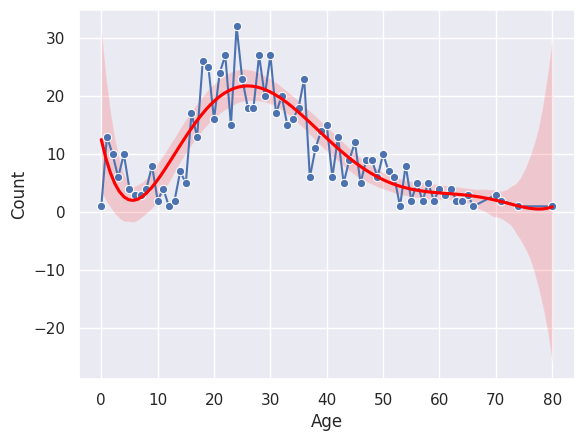

In [180]:
import seaborn as sns

# Runde die Werte in 'Age' zur nächsten Ganzzahl
df['Age'] = df['Age'].round()

# Berechne die Anzahl jeder Altersgruppe und erstelle einen neuen DataFrame
counts = df['Age'].value_counts().sort_index()
counts_df = pd.DataFrame({'Age': counts.index, 'Count': counts.values})

# Stil festlegen
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Liniendiagramm erstellen
sns.lineplot(data=counts_df, x="Age", y="Count", marker='o')

# Glättungslinie hinzufügen
sns.regplot(data=counts_df, x="Age", y="Count", scatter=False, order=6, line_kws={'color': 'red'})

# Diagramm anzeigen
plt.show()

#### b. (10%) Waren die Passagiere im Allgemeinen jünger als der Durchschnitt oder älter? Visualisieren Sie Ihre Ergebnisse!

#### c. (10%) Ändert sich das Ergebnis in (b) für Männer und Frauen?

#### d. (10%) Welches Geschlecht hatte eine höhere Überlebensrate?

#### e. (10%) Wie hoch ist der durchschnittliche Fahrpreis (fare) für jede Klasse? 

#### f. (10%) Welche Fahrkartenklasse hatte eine höhere Überlebensrate?